<a href="https://colab.research.google.com/github/NLZT/Deep-Dive-Projects/blob/main/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Definition
Develop a Deep Learning Neural Net that can tell the difference between a dog and a cat.

In [ ]:
#Import Modules
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
import numpy as np
from skimage import io
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


import tensorflow.keras as keras
import tensorflow as tf

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


#Data Collection & EDA

In [ ]:
ydir='/drive/MyDrive/y.pickle'
xdir='/drive/MyDrive/X.pickle'

In [ ]:
y=pickle.load(open(ydir, 'rb'))
x=pickle.load(open(xdir, 'rb'))

In [ ]:
x.shape

(24946, 100, 100, 1)

In [ ]:
x[0]

array([[[ 95],
        [ 94],
        [ 98],
        ...,
        [170],
        [172],
        [171]],

       [[ 92],
        [ 91],
        [ 95],
        ...,
        [170],
        [172],
        [171]],

       [[ 89],
        [ 91],
        [ 92],
        ...,
        [165],
        [169],
        [169]],

       ...,

       [[ 84],
        [ 76],
        [ 73],
        ...,
        [135],
        [164],
        [154]],

       [[ 82],
        [ 79],
        [ 71],
        ...,
        [142],
        [134],
        [153]],

       [[ 80],
        [ 85],
        [ 85],
        ...,
        [151],
        [146],
        [138]]], dtype=uint8)

In [ ]:
x2=x.reshape(x.shape[0],x.shape[1],x.shape[2])

In [ ]:
x2[0]

array([[ 95,  94,  98, ..., 170, 172, 171],
       [ 92,  91,  95, ..., 170, 172, 171],
       [ 89,  91,  92, ..., 165, 169, 169],
       ...,
       [ 84,  76,  73, ..., 135, 164, 154],
       [ 82,  79,  71, ..., 142, 134, 153],
       [ 80,  85,  85, ..., 151, 146, 138]], dtype=uint8)

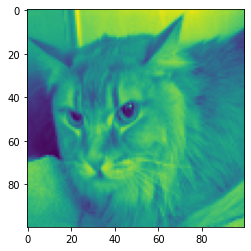

In [ ]:
plt.imshow(x2[25])
plt.show()

In [ ]:
y[20]

0

In [ ]:
y.count(0)

12470

In [ ]:
y.count(1)

12476

#Data Cleaning

In [ ]:
x = tf.keras.utils.normalize(x, axis=1)

In [ ]:
x[0]

array([[[0.08537916],
        [0.08454858],
        [0.0877948 ],
        ...,
        [0.10820611],
        [0.10831664],
        [0.10812842]],

       [[0.08268298],
        [0.08185022],
        [0.0851072 ],
        ...,
        [0.10820611],
        [0.10831664],
        [0.10812842]],

       [[0.07998679],
        [0.08185022],
        [0.08241961],
        ...,
        [0.10502358],
        [0.10642739],
        [0.10686376]],

       ...,

       [[0.07549315],
        [0.06835843],
        [0.06539817],
        ...,
        [0.08592838],
        [0.10327865],
        [0.09737881]],

       [[0.0736957 ],
        [0.07105679],
        [0.06360644],
        ...,
        [0.09038393],
        [0.08438622],
        [0.09674648]],

       [[0.07189824],
        [0.0764535 ],
        [0.07614855],
        ...,
        [0.09611249],
        [0.09194319],
        [0.08726154]]])

#Data Processing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, np.array(y), test_size=0.2)
print(x_train.shape, x_test.shape, len(y_train), len(y_test))

(19956, 100, 100, 1) (4990, 100, 100, 1) 19956 4990


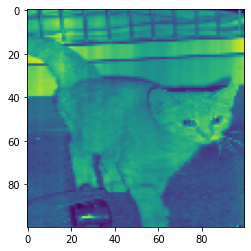

In [ ]:
x3=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2])
plt.imshow(x3[234])
plt.show()

In [ ]:
model = Sequential()

# Reshape data to be 4 dimensional
#x_train2 = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)

# Define input layer & first hidden layer
model.add(Conv2D(64, (3,3), input_shape=(100,100,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

# Define second hidden layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten data to be used in output layer
model.add(Flatten())

# Define output layer
model.add(Dense(2, activation = 'sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])     

# Fit model
model.fit(x_train, y_train, epochs=14)

Epoch 1/14
624/624 [==============================] - 10s 16ms/step - loss: 0.6635 - accuracy: 0.5950
Epoch 2/14
624/624 [==============================] - 10s 16ms/step - loss: 0.5727 - accuracy: 0.7031
Epoch 3/14
624/624 [==============================] - 10s 16ms/step - loss: 0.5079 - accuracy: 0.7561
Epoch 4/14
624/624 [==============================] - 10s 16ms/step - loss: 0.4724 - accuracy: 0.7791
Epoch 5/14
624/624 [==============================] - 10s 16ms/step - loss: 0.4434 - accuracy: 0.7976
Epoch 6/14
624/624 [==============================] - 10s 16ms/step - loss: 0.4193 - accuracy: 0.8084
Epoch 7/14
624/624 [==============================] - 10s 16ms/step - loss: 0.3969 - accuracy: 0.8218
Epoch 8/14
624/624 [==============================] - 10s 16ms/step - loss: 0.3720 - accuracy: 0.8358
Epoch 9/14
624/624 [==============================] - 10s 16ms/step - loss: 0.3515 - accuracy: 0.8448
Epoch 10/14
624/624 [==============================] - 10s 16ms/step - loss: 0.323

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

156/156 [==============================] - 2s 10ms/step - loss: 0.5509 - accuracy: 0.7659
0.5509157180786133
0.7659318447113037


In [ ]:
num=3

In [ ]:
predictions = model.predict(x_test)
print(predictions[num])

156/156 [==============================] - 1s 7ms/step
[0.19647847 0.8334631 ]


In [ ]:
y_test[num]

1

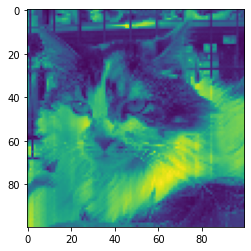

In [ ]:
x3=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2])
plt.imshow(x3[num])
plt.show()

#Import Picture Test

In [ ]:
pic=io.imread('/drive/MyDrive/Cog.jpg')

In [ ]:
pic=io.imread('/drive/MyDrive/dog.jpg')

In [ ]:
pic

array([[[195, 232, 250],
        [195, 232, 250],
        [195, 232, 250],
        ...,
        [194, 232, 251],
        [194, 232, 251],
        [194, 232, 251]],

       [[195, 232, 250],
        [195, 232, 250],
        [195, 232, 250],
        ...,
        [194, 232, 251],
        [194, 232, 251],
        [194, 232, 251]],

       [[196, 233, 251],
        [196, 233, 251],
        [196, 233, 251],
        ...,
        [194, 232, 251],
        [194, 232, 251],
        [194, 232, 251]],

       ...,

       [[151, 164,  84],
        [142, 161,  72],
        [133, 157,  61],
        ...,
        [ 95,  74,  53],
        [ 97,  76,  55],
        [ 98,  77,  56]],

       [[167, 178, 100],
        [159, 172,  90],
        [149, 168,  76],
        ...,
        [ 82,  61,  40],
        [ 93,  72,  51],
        [105,  84,  63]],

       [[176, 177, 107],
        [170, 177,  99],
        [162, 176,  89],
        ...,
        [ 81,  60,  39],
        [ 90,  69,  48],
        [ 99,  78,  57]]

In [ ]:
pic.shape

(455, 400, 3)

In [ ]:
image = color.rgb2gray(pic)

image

array([[0.88406   , 0.88406   , 0.88406   , ..., 0.88350941, 0.88350941,
        0.88350941],
       [0.88406   , 0.88406   , 0.88406   , ..., 0.88350941, 0.88350941,
        0.88350941],
       [0.88798157, 0.88798157, 0.88798157, ..., 0.88350941, 0.88350941,
        0.88350941],
       ...,
       [0.60968431, 0.5903749 , 0.56854275, ..., 0.30175843, 0.30960157,
        0.31352314],
       [0.66681843, 0.64049137, 0.61697765, ..., 0.25077804, 0.29391529,
        0.34097412],
       [0.67349216, 0.6662302 , 0.65393059, ..., 0.24685647, 0.28215059,
        0.31744471]])

In [ ]:
image_resized = resize(image, (100, 100, 1), anti_aliasing=True)

In [ ]:
image_resized.shape

(100, 100, 1)

In [ ]:
np.array([image_resized]).shape

(1, 100, 100, 1)

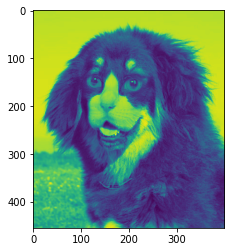

In [ ]:
plt.imshow(image)#, cmap=plt.cm.binary)
plt.show()

In [ ]:
test=model.predict(np.array([image_resized]))
print(test)

1/1 [==============================] - 0s 16ms/step
[[0.24064612 0.80810744]]
